# Convex Optimization

## Primal Problem

In [1]:
import os
import numpy as np
import scipy as sp
import pandas as pd
# from scipy.special import lqn
# import sympy as smp
import cvxpy as cp
import matplotlib.pyplot as plt
# import mpmath as mp

In [2]:
np.set_printoptions(precision = 600)

########## VALUES ##########
# sa = [-1, 0, 4/3, 2, 3, 3.8][3]                                       # [?]
sa = 2
M = 40                                                             # Number of interpolation points
lmax = 20                                                          # Maximum angular momentum

print("sa =", sa)
print("M =", M)
print("lmax =", lmax)


# xi = np.linspace(np.pi/M * (1/2), np.pi/M * (2*M - 1/2), 2*M)       # Interpolation points
# s = sa + (4 - sa) / np.cos(xi/2)**2                                 # Mapping from xi to s
# rho = np.pi/4 * np.sqrt((s - 4)/s)                                  # Mapping from s to rho

Mfl = (lmax + 1) * M
Mfn = M * (M + 1) // 2
Mfn2 = (M + 1) * (M + 2) // 2

print("Mfl =", Mfl)
print("Mfn =", Mfn)
print("Mfn2 =", Mfn2)

xiv = np.zeros(M)

a0h = np.zeros((1, 1))
b0h = np.zeros((1, 1))
h0R = np.zeros((Mfl, 1))
a1h = np.zeros((M, 1))
b1h = np.zeros((M, 1))
h1R = np.zeros((Mfl, M))
h1I = np.zeros((Mfl, M))
a2h = np.zeros((Mfn, 1))
b2h = np.zeros((Mfn, 1))
h2R = np.zeros((Mfl, Mfn))
h2I = np.zeros((Mfl, Mfn))

h0RA = np.zeros((Mfl, 1))
h1RA = np.zeros((Mfl, M))
h1IA = np.zeros((Mfl, M))
h2RA = np.zeros((Mfl, Mfn))
h2IA = np.zeros((Mfl, Mfn))
h1IB = np.zeros((Mfl, M))
h2IB = np.zeros((Mfl, Mfn))

Lambdav = np.zeros(Mfl)

sa = 2
M = 40
lmax = 20
Mfl = 840
Mfn = 820
Mfn2 = 861


TBD.

In [3]:
mreg = [8]
nfv = [1]
nv = [50]

alphav = np.arange(0, 2*np.pi, 0.001)
tv = np.zeros((1, len(mreg), len(alphav)))
c0v = np.zeros((1, len(mreg), len(alphav)))
c2v = np.zeros((1, len(mreg), len(alphav)))
fdv = np.zeros(len(mreg))

Making the file directories...

In [4]:
saf = str(sa).replace("p", ".")
dataKFile = os.path.join(os.getcwd(), f"primal_3.0_points_data_P2_nopole_sa{saf}_lmax{lmax}_M{M}.dat")
dataOutFile = os.path.join(os.getcwd(), f"primal_3.0_points_data_P2_nopole_sa{saf}_lmax{lmax}_M{M}_ncoeff{len(nv)}_outB.datx")

print("dataKFile =", dataKFile)
print("dataOutFile =", dataOutFile)

dataKFile = c:\Razzdrive\Education\University\Graduate\Purdue University\Year 1 Summer\PHYS 590 - Topics in Quantum Field Theory\dev\Python\primal_3.0_points_data_P2_nopole_sa2_lmax20_M40.dat
dataOutFile = c:\Razzdrive\Education\University\Graduate\Purdue University\Year 1 Summer\PHYS 590 - Topics in Quantum Field Theory\dev\Python\primal_3.0_points_data_P2_nopole_sa2_lmax20_M40_ncoeff1_outB.datx


Reading the data.

In [5]:
with open(dataKFile, 'r') as fileID:
    for i in range(0, M):
        xiv[i] = float(fileID.readline().split()[0])

    # REGULAR
    a0h[0] = float(fileID.readline())

    b0h[0] = float(fileID.readline())

    for i in range(0, Mfl):
        h0R[i] = float(fileID.readline().split()[0])

    for i in range(0, M):
        a1h[i] = float(fileID.readline().split()[0])

    for i in range(0, M):
        b1h[i] = float(fileID.readline().split()[0])

    for i in range(0, M):
        for j in range(0, Mfl):
            h1R[j, i] = float(fileID.readline().split()[0])

    for i in range(0, M):
        for j in range(0, Mfl):
            h1I[j, i] = float(fileID.readline().split()[0])

    for i in range(0, Mfn):
        a2h[i] = float(fileID.readline().split()[0])

    for i in range(0, Mfn):
        b2h[i] = float(fileID.readline().split()[0])

    for i in range(0, Mfn):
        for j in range(0, Mfl):
            h2R[j, i] = float(fileID.readline().split()[0])

    for i in range(0, Mfn):
        for j in range(0, Mfl):
            h2I[j, i] = float(fileID.readline().split()[0])


    # RESCALED
    for i in range(0, Mfl):
        h0RA[i] = float(fileID.readline().split()[0])

    for i in range(0, M):
        for j in range(0, Mfl):
            h1RA[j, i] = float(fileID.readline().split()[0])

    for i in range(0, M):
        for j in range(0, Mfl):
            h1IA[j, i] = float(fileID.readline().split()[0])

    for i in range(0, Mfn):
        for j in range(0, Mfl):
            h2RA[j, i] = float(fileID.readline().split()[0])

    for i in range(0, Mfn):
        for j in range(0, Mfl):
            h2IA[j, i] = float(fileID.readline().split()[0])

    for i in range(0, M):
        for j in range(0, Mfl):
            h1IB[j, i] = float(fileID.readline().split()[0])

    for i in range(0, Mfn):
        for j in range(0, Mfl):
            h2IB[j, i] = float(fileID.readline().split()[0])

    for i in range(0, Mfl):
        Lambdav[i] = float(fileID.readline().split()[0])

# TRANSPOSING TO MATCH MATLAB
# h1R = h1R.T
# h1I = h1I.T
# h2R = h2R.T
# h2I = h2I.T
# h1RA = h1RA.T
# h1IA = h1IA.T
# h2RA = h2RA.T
# h2IA = h2IA.T
# h1IB = h1IB.T
# h2IB = h2IB.T


In [6]:
print(np.shape(a0h))
print(np.shape(b0h))
print(np.shape(h0R))
print(np.shape(a1h))
print(np.shape(b1h))
print(np.shape(h1R))
print(np.shape(h1I))
print(np.shape(a2h))
print(np.shape(b2h))
print(np.shape(h2R))
print(np.shape(h2I))
print("######")
print(np.shape(h0RA))
print(np.shape(h1RA))
print(np.shape(h1IA))
print(np.shape(h2RA))
print(np.shape(h2IA))
print(np.shape(h1IB))
print(np.shape(h2IB))


(1, 1)
(1, 1)
(840, 1)
(40, 1)
(40, 1)
(840, 40)
(840, 40)
(820, 1)
(820, 1)
(840, 820)
(840, 820)
######
(840, 1)
(840, 40)
(840, 40)
(840, 820)
(840, 820)
(840, 40)
(840, 820)


Perform the optimization.

In [7]:
# Reorder and recondition linear constraint matrix
A = np.block([[h0RA, h1RA, h2RA],
              [np.zeros((Mfl, 1)), h1IA, h2IA],
              [np.zeros((Mfl, 1)), h1IB, h2IB]])

# df_A = pd.DataFrame(A)
# print(df_A.iloc[0:7, 0:7])
# print(A.shape)
# print(A[2519][860])

# Perform QR decomposition
Q, R, P = sp.linalg.qr(A.T, mode='full', pivoting=True)
# df_Q = pd.DataFrame(Q)
# df_R = pd.DataFrame(R)
# df_P = pd.DataFrame(P)
# print(df_Q.iloc[0:7, 0:7])
# print(df_R.iloc[0:7, 0:7])
# print(df_P[0:7])

ap = np.concatenate([a0h, a1h.T, a2h.T], axis=1) @ Q
bp = np.concatenate([b0h, b1h.T, b2h.T], axis=1) @ Q
# # ap = np.outer(np.concatenate([a0h, a1h.T, a2h.T], axis=1), Q)
# # bp = np.outer(np.concatenate([b0h, b1h.T, b2h.T], axis=1), Q)
# df_ap = pd.DataFrame(ap)
# print(df_ap.iloc[0:7, 0:7])
# print(ap.shape)
# df_bp = pd.DataFrame(bp)
# print(df_bp.iloc[0:7, 0:7])
# print(bp.shape)

invP = np.argsort(P)
indRA = invP[:Mfl] #index 
indIA = invP[Mfl:2*Mfl]
indIB = invP[2*Mfl:3*Mfl]
# print(invP[0:7])
# print(indRA[0:7])
# print(indIA[0:7])
# print(indIB[0:7])

sv = 4 / np.cos(xiv/2)**2

In [8]:
with open(dataOutFile, 'w') as f:
    for count_alpha, alpha in enumerate(alphav):
        count = 0
        for nf in nfv:
            for n in nv:
                for Mreg in 10**np.array(mreg): # regulator: to stop overfitting, it is a plateau value, could be solved with higher precision
                    # DEFINE VARIABLES
                    v = cp.Variable((Mfn2))
                    t = cp.Variable()
                    constraints = []

                    # REDUCED VARIABLES
                    constraints += [v[i] == 0 for i in range(n * (M + 1), Mfn2)]
                    hf1 = R.T @ v

                    hRA = hf1[indRA]
                    hIA = hf1[indIA]
                    hIB = hf1[indIB]

                    # UNITARITY
                    constraints += [
                        cp.norm(cp.vstack([hRA, hIA]), 2, axis=0) <= cp.sqrt(2 * hIB)
                    ]

                    # REGULARIZATION
                    rhon = cp.norm(v[nf * (M + 1):], 32)
                    constraints += [
                        rhon <= Mreg
                    ]

                    # FUNCTIONAL
                    c0 = (np.pi/4) * ap @ v
                    c2 = (np.pi/4) * bp @ v
                    t = c0 * np.cos(alpha) + c2 * np.sin(alpha)

                    # OBJECTIVE
                    obj = cp.Maximize(t)

                    # SOLVE CONVEX OPTIMIZATION PROBLEM
                    prob = cp.Problem(obj, constraints)
                    prob.solve(solver=cp.MOSEK)

                    tv[0, count, count_alpha] = prob.value
                    if (prob.status != 'infeasible'):
                        c0v[0, count, count_alpha] = c0.value
                        c2v[0, count, count_alpha] = c2.value

                    print(c0.value[0])
                    print(c2.value[0])
                    fdv[count] = cp.norm(v[nf * (M + 1):], 32).value

                    print(f'alpha: {alpha:.3f}\t')
                    print(f'Mreg: {Mreg:.3f}\t')
                    print(f'prob: {prob.value:.20f}\t')
                    print(f'c0: {c0.value[0]:.3f}\t')
                    print(f'c2: {c2.value[0]:.3f}\t')
                    print(f'fdv: {fdv[count]:.3f}\t')
                    print(f'Status: {prob.status}\t')

                    f.write(f'{alpha:.3f}\t {Mreg:.3f}\t {prob.value:.20f}\t {c0.value[0]:.3f}\t {c2.value[0]:.3f}\t {fdv[count]:.3f}\t {prob.status}\n')

                    count += 1

C:\Users\Razz\AppData\Local\Temp\ipykernel_22096\3400292735.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c0v[0, count, count_alpha] = c0.value
C:\Users\Razz\AppData\Local\Temp\ipykernel_22096\3400292735.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c2v[0, count, count_alpha] = c2.value


2.439106296346081
0.0526320634139596
alpha: 0.000	
Mreg: 100000000.000	
prob: 2.43910629634608078220	
c0: 2.439	
c2: 0.053	
fdv: 86913.721	
Status: optimal	
2.4390998977300544
0.05263410221296103
alpha: 0.001	
Mreg: 100000000.000	
prob: 2.43915131227364767597	
c0: 2.439	
c2: 0.053	
fdv: 82804.550	
Status: optimal	
2.439104687002688
0.05263184079124998
alpha: 0.002	
Mreg: 100000000.000	
prob: 2.43920507240634698576	
c0: 2.439	
c2: 0.053	
fdv: 85958.996	
Status: optimal	
2.439092541180794
0.05263338798269096
alpha: 0.003	
Mreg: 100000000.000	
prob: 2.43923946519968870561	
c0: 2.439	
c2: 0.053	
fdv: 76195.253	
Status: optimal	
2.4390601093054878
0.05263620030697119
alpha: 0.004	
Mreg: 100000000.000	
prob: 2.43925114109040563903	
c0: 2.439	
c2: 0.053	
fdv: 65687.204	
Status: optimal	
2.439042626843655
0.0526378483362214
alpha: 0.005	
Mreg: 100000000.000	
prob: 2.43927532701939675519	
c0: 2.439	
c2: 0.053	
fdv: 61641.103	
Status: optimal	
2.43901751624698
0.0526389169420437
alpha: 0.006	
Mr

Plotting

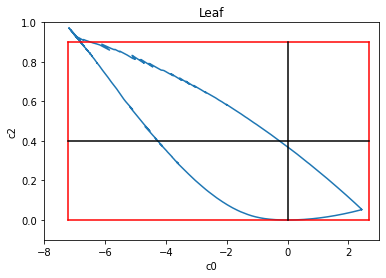

In [9]:
# Plotting
plt.rcParams['savefig.dpi'] = 1000
plt.figure()
colors = 'morobo'

for j in range(count):
    j1 = 2 * (j % (len(colors) // 2)) - 1
    plt.plot(c0v[0, j, :], c2v[0, j, :], colors[j1:j1 + 2])

plt.plot([2.6613, 2.6613], [0.0, 0.9], 'r')
plt.plot([-7.2, -7.2], [0, 0.9], 'r')
plt.plot([-7.2, 2.6613], [0.9, 0.9], 'r')
plt.plot([-7.2, 2.6613], [0, 0], 'r')
plt.plot([0, 0], [0.0, 0.9], 'k')
plt.plot([-7.2, 2.6613], [0.4, 0.4], 'k')
plt.xlabel('c0')
plt.xlim(-8, 3)
plt.ylabel('c2')
plt.ylim(-0.1, 1.0)
plt.title('Leaf')
plt.savefig(f'primal_3.0_points_data_P2_nopole_sa{saf}_lmax{lmax}_M{M}_ncoeff{len(nv)}_outB.png')
plt.show()

In [10]:
print(np.max(c0v))

2.4391398656986145


The following code will plot from a data file that has already been generated.

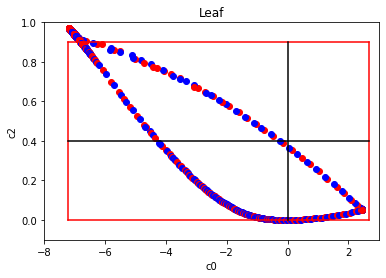

In [51]:
datafile = os.path.join(os.getcwd(), f"dual_1.0_points_data_P2_nopole_sa{saf}_lmax{lmax}_M{M}_ncoeff{len(nv)}_outB__1.datx")
plt.rcParams['savefig.dpi'] = 1000
plt.figure()
colors = 'morobo'

c0v_data = np.zeros((len(alphav)))
c2v_data = np.zeros((len(alphav)))

with open(datafile, 'r') as f:
    for i in range(0, len(alphav)):
        data = f.readline().split('\t')
        c0v_data[i] = float(data[3])
        c2v_data[i] = float(data[4])

for j in range(len(alphav)):
    j1 = 2 * (j % (len(colors) // 2)) - 1
    plt.plot(c0v_data[j], c2v_data[j], colors[j1:j1 + 2])

plt.plot([2.6613, 2.6613], [0.0, 0.9], 'r')
plt.plot([-7.2, -7.2], [0, 0.9], 'r')
plt.plot([-7.2, 2.6613], [0.9, 0.9], 'r')
plt.plot([-7.2, 2.6613], [0, 0], 'r')
plt.plot([0, 0], [0.0, 0.9], 'k')
plt.plot([-7.2, 2.6613], [0.4, 0.4], 'k')
plt.xlabel('c0')
plt.xlim(-8, 3)
plt.ylabel('c2')
plt.ylim(-0.1, 1.0)
plt.title('Leaf')
# plt.savefig(f'dual_1.0_points_data_P2_nopole_sa{saf}_lmax{lmax}_M{M}_ncoeff{len(nv)}_outB.png')
plt.show()